In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
def get_data():
    mjo_df = pd.read_pickle('mjo.pickle.xz')
    deg_day_df = pd.read_pickle('deg_days5.pickle.xz')
    df = mjo_df.join(deg_day_df, how='inner')

    mjo_mask = df.columns.isin(['RMM1', 'RMM2'])
    dd_mask = df.columns.isin(['cdd_anom', 'hdd_anom'])

    # MJO is available two days prior
    cols_to_shift = df.columns[mjo_mask]
    df[cols_to_shift] = df[cols_to_shift].shift(2)

    # Forecast is for 16-20 day period, so 17 days after today is center.
    cols_to_shift = df.columns[dd_mask]
    df[cols_to_shift] = df[cols_to_shift].shift(-17)

    return df

In [13]:
def criteria_filter(c, r):
    res = np.sqrt((c['RMM1'] - r[0])**2 + (c['RMM2'] - r[1])**2) < .5

    return res

In [14]:
def find_analogs(df, today, rmm):
    # Look for analogs within 45 days of today's date
    # between the years indicated
    first_year = 1981
    last_year = 2018
    tdelt = pd.to_timedelta(45, 'D')

    periods = []
    for y in range(first_year, last_year+1):
        try:
            mid = pd.Timestamp(year=y, month=today.month, day=today.day)
        except ValueError:  # Leap day!
            mid = pd.Timestamp(year=y, month=3, day=1)
        prd = pd.period_range(mid - tdelt, mid + tdelt)
        for p in prd:
            periods.append(p.to_timestamp())
    periods = pd.to_datetime(periods)
    candidates = df.loc[periods]

    criteria = criteria_filter(candidates, rmm)
    analogs = candidates[criteria]

    return(analogs)

In [84]:
# Input data
today = pd.Timestamp('2019-7-23')
cur_rmm1 = -1.4225199
cur_rmm2 = -1.0406108

In [85]:
df = get_data()

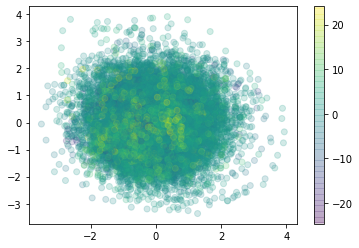

In [86]:
plt.scatter(df['RMM1'], df['RMM2'], c=df['cdd_anom'], alpha=0.2)
plt.colorbar()

In [87]:
analogs = find_analogs(df, today, (cur_rmm1, cur_rmm2))
print(analogs['cdd_anom'].describe())

count    180.000000
mean       2.704389
std        7.979064
min      -18.480000
25%       -2.542500
50%        3.755000
75%        8.380000
max       18.510000
Name: cdd_anom, dtype: float64


In [88]:
analogs

,RMM1,RMM2,cdd_anom,hdd_anom
1981-08-30,-1.294030,-0.690660,-4.60,7.450000e+00
1981-08-31,-1.461820,-0.759100,-9.63,1.048000e+01
1981-09-01,-1.335360,-0.936730,-12.22,1.200000e+01
1981-09-02,-1.116500,-1.251280,-12.28,1.063000e+01
1983-09-04,-1.009260,-1.113310,-0.89,1.627000e+01
1983-09-05,-1.391130,-1.352150,-7.45,2.112000e+01
1983-09-06,-1.529190,-1.310800,-11.20,2.232000e+01
1985-07-21,-1.579730,-0.628980,-4.51,2.500000e-01
1985-07-22,-1.586300,-0.673090,-3.31,6.400000e-01
1985-07-23,-1.217100,-0.586350,-3.29,9.300000e-01


In [99]:
def draw_mjo_phase(ax):
    c = plt.Circle((0,0), radius=1, fill=False)
    ax.add_patch(c)

    s2 = np.sqrt(2)/2
    lines = ((( 1, 3), (0,0)), (( s2, 3), ( s2, 3)), ((0,0), ( 1, 3)), ((-s2,-3), ( s2, 3)),
             ((-1,-3), (0,0)), ((-s2,-3), (-s2,-3)), ((0,0), (-1,-3)), (( s2, 3), (-s2,-3)))
    params = {'c': 'k', 'ls': '--', 'lw': 1.}
    for xy in lines:
        ax.plot(xy[0], xy[1], **params)
 
    phases = ((-2.9, -1.2, '1'), (-1.2, -2.9, '2'), (1.1, -2.9, '3'), (2.7, -1.2, '4'),
              (-2.9,  1.2, '8'), (-1.2,  2.7, '7'), (1.1,  2.7, '6'), (2.7,  1.2, '5'))
    for p in phases:
        ax.text(*p)

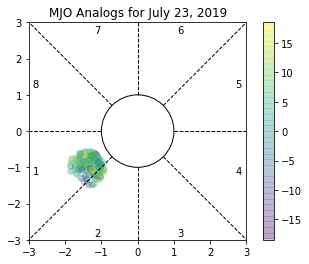

In [100]:
fig = plt.figure()
ax = plt.axes()
s = ax.scatter(analogs['RMM1'], analogs['RMM2'], c=analogs['cdd_anom'], alpha=0.2)
plt.colorbar(s)
ax.set(xlim=(-3, 3), ylim=(-3, 3), aspect='equal', title=f'MJO Analogs for {today:%B %d, %Y}')
draw_mjo_phase(ax)